### Question - 1
### How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans- In the resultant matrix there will be n*m elements . So let us find number of operations there will be in obtaining 1 cell of the matrix. So to obtain an element , we multiply each element of the row with each element of the column , as there are k elements in row of 1st matrix and k elements in column of 2nd matrix , by the multiplication there will be k multiplication among them and k-1 addition for adding all those numbers obtained after multiplication.

let a and b the two matrix then the lets say we want in resultant matrix say c , the element c(i,j) so {a(i,1),a(i,2).....a(i,k)} will multiply with {b(1,j),b(2,j),......,b(k,j)} . So there will be k multiplications as {a(i,1)*b(1,j),a(i,2)*b(2,j),......,a(i,k)*b(k,j)} and to add these k numbers we will perform (k-1) additions .

So for obtaining 1 element in resultant matrix we will perform k multiplication and k-1 addition , thus to obtain n*m elements we will perform n*m*k multiplication and n*m*(k-1) addition.


### Question -2

### Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [73]:
### Code 

### Part 1 Multiplying two list using numpy
import time
import numpy as np

matrix1 = np.random.rand(200,200)
matrix2 = np.random.rand(200,200)

start = time.process_time()
matrix3 = np.matmul(matrix1,matrix2)
end = time.process_time()

print("Time taken = " + str(1000*(end - start)) + " ms") 
print(matrix3)


Time taken = 15.625 ms
[[48.55050696 46.72982269 49.67702931 ... 51.72753034 46.09570232
  47.86647274]
 [49.67337842 47.85638547 49.10851768 ... 51.92105641 44.92504364
  47.15484567]
 [51.34232809 50.08733307 49.01168716 ... 51.73794112 46.51691817
  46.97062908]
 ...
 [52.91085572 50.19899774 51.35214378 ... 53.29096553 46.65699339
  51.87599997]
 [52.83011813 51.16251845 52.48159462 ... 54.29401859 50.14426532
  49.98695435]
 [48.54649184 46.33707883 49.91300285 ... 50.91319045 46.49749953
  47.5405472 ]]


In [75]:
### Part 2 Multiplying two list manually
n = 200
matrix4 = []
start = time.process_time()
for i in range(n):
    list = []
    for j in range(n):
        sum = 0
        for k in range(n):
            sum = sum + (matrix1[i][k]*matrix2[k][j])
        list.append(sum)
    matrix4.append(list)
end = time.process_time()
print("Time taken = " + str(1000*(end - start)) + " ms") 
print(matrix4)

Time taken = 6203.125 ms
[[48.55050695627468, 46.7298226942881, 49.677029311233085, 44.511438812247626, 45.64135988557856, 50.82241218549295, 52.0629473075905, 47.08949544894855, 50.312358897891414, 48.198914240165614, 50.548113224714236, 46.975671338701225, 50.31215209991494, 50.49698576009081, 44.74895093520164, 47.90576962247886, 45.02033042924924, 48.35100698136024, 50.802695180854144, 48.17446883859614, 46.89548770124805, 46.375532471234926, 46.65678885510235, 48.323320699017685, 50.66639707196954, 47.99158871489086, 46.58627496805152, 44.43294982870192, 52.77517544187527, 48.660773778552795, 49.60878125855649, 42.51455548209835, 43.72844605236668, 50.07639371440252, 50.02195557057894, 45.845693972293525, 44.18120448537439, 45.19427845426779, 50.55187287160739, 47.500511109445014, 47.358316178957296, 49.35205543114768, 47.35677096011486, 45.792622550033705, 45.39434558940163, 48.179335705293184, 50.542315983986704, 45.72526358284653, 48.64573878948799, 46.720896572406666, 39.29013

So clearly numpy takes around 15.625 ms and manual multiplication takes around 6203.125 ms , thus numpy multiplication is faster.
The reason behind this is in manual implementation , we are using a O(N^3) time complexity , whereas the numpy uses highly optimised carefully tuned BLAS(Basic Linear Algebra Subprograms) .These libraries may be provided by NumPy itself using C versions of a subset of their reference implementations but, when possible, highly optimized libraries that take advantage of specialized processor functionality are preferred.

Reference:

 1)https://numpy.org/doc/stable/reference/generated/numpy.matmul.html --> for matrix multiplication by numpy method
 
 2)https://www.kaggle.com/code/yushg123/for-loops-vs-vectorized-who-wins-and-by-how-much --> for calculation of time in python
 
 3)https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg -->reason of fast timing

### Question 3 
### Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

### Answer:

Let us suppose there are n elements in the list . 

So as per the algo to find highest we need one pass , to find the second highest we need two pass , so to find median which is (n/2) , we will need n/2 passes , and for each pass there are n elements we need to compare from the entire timr complexity will be O(n*(n/2)) approx. O(n^2).

A better method can be we can sort the given array and then access the middle element , this will give us the median . The time complexity will be O(nlogn) which is the time complexity of sorting.

In [128]:

### Method -1 (Pass method)

list = np.random.rand(1000)
n = len(list)
curr_max = 1e9
start = time.process_time()
for i in range((n//2)+1):
    mx = -1
    for j in range(n):
        if list[j]<curr_max and list[j]>mx:
            mx = list[j]
    if i == n//2 and n%2==0:
        curr_max = (curr_max+mx)/2
    else:
        curr_max = mx
print(curr_max)
end = time.process_time()
print("Time taken = " + str(1000*(end - start)) + " ms") 

0.4997612633979567
Time taken = 187.5 ms


In [124]:
## Method -2 (Sort method)
start = time.process_time()
list.sort()
n = len(list)
if n%2==0:
    ans = (list[n//2]+list[(n//2)-1])/2
else:
    ans = list[n//2]
print(ans)
end = time.process_time()
print("Time taken = " + str(1000*(end - start)) + " ms") 

0.4987436493544361
Time taken = 46.875 ms


In [126]:
## Method - 3 (numpy median method)
start = time.process_time()
print(np.median(list))
end = time.process_time()
print("Time taken = " + str(1000*(end - start)) + " ms") 

0.4987436493544361
Time taken = 0.0 ms


So on comparing it is evident for even 1000 random element the first method takes 187.5 ms , whereas 1000000 elements for 2nd and 3rd method takes time as 46.875 ms and 0.0 ms . So numpy.median is still faster than the method provided.

### Question 4
### What is the gradient of the following function with respect to x and y?    x^2y+y^3sin(x)


### Solution:

f(x,y) = x^2 . y + y^3 . sin(x)

gradient w.r.t. x
df(x,y)/dx = 2xy + (y^3)cosx

gradient w.r.t. y
df(x,y)/dy = x^2 + 3(y^2)sinx

So, gradient of entire function is (df/dx,df/dy) which is (2xy + (y^3)cosx,x^2 + 3(y^2)sinx)

In [143]:
### Random points are (0,0),(0,1),(0,2),(1,2),(1,5),(2,7)
import math

### fx function denotes gradient w.r.t. x and fy denotes gradient w.r.t. y

def fx(x,y):
    return (2*x*y)+(y**3)*(math.cos(x))

def fy(x,y):
    return (x**2)+(3*(y**2)*(math.sin(x)))

print(fx(0,0),fy(0,0))
print(fx(0,1),fy(0,1))
print(fx(0,2),fy(0,2))
print(fx(1,2),fy(1,2))
print(fx(1,5),fy(1,5))
print(fx(2,7),fy(2,7))

0.0 0.0
1.0 0.0
8.0 0.0
8.322418446945118 11.097651817694757
77.53778823351747 64.11032386059225
-114.73836493566984 137.6667217433752


### Question 5
### Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [150]:
!pip install jax jaxlib

In [172]:
import jax
from jax import grad
def f(x,y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f, argnums=(0, 1))

gradient = grad_f(0.0,0.0)
print(gradient[0],gradient[1])
gradient = grad_f(0.0,1.0)
print(gradient[0],gradient[1])
gradient = grad_f(0.0,2.0)
print(gradient[0],gradient[1])
gradient = grad_f(1.0,2.0)
print(gradient[0],gradient[1])
gradient = grad_f(1.0,5.0)
print(gradient[0],gradient[1])
gradient = grad_f(2.0,7.0)
print(gradient[0],gradient[1])

0.0 0.0
1.0 0.0
8.0 0.0
8.322418 11.0976515
77.53778 64.11032
-114.73837 137.66672


So yes the answer matches when we used jax function

Reference:

https://jax.readthedocs.io/en/latest/_autosummary/jax.grad.html

### Question 6
### Use sympy to confirm that you obtain the same gradient analytically.

In [196]:
from sympy import symbols, exp, sin, diff
import math

x, y = symbols('x y')
expr = x**2 * y + y**3 * sin(x)
print(diff(expr, x).subs({x:0,y:0}).evalf(),diff(expr, y).subs({x:0,y:0}).evalf())
print(diff(expr, x).subs({x:0,y:1}).evalf(),diff(expr, y).subs({x:0,y:1}).evalf())
print(diff(expr, x).subs({x:0,y:2}).evalf(),diff(expr, y).subs({x:0,y:2}).evalf())
print(diff(expr, x).subs({x:1,y:2}).evalf(),diff(expr, y).subs({x:1,y:2}).evalf())
print(diff(expr, x).subs({x:1,y:5}).evalf(),diff(expr, y).subs({x:1,y:5}).evalf())
print(diff(expr, x).subs({x:2,y:7}).evalf(),diff(expr, y).subs({x:2,y:7}).evalf())

### Reference:

### https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

0 0
1.00000000000000 0
8.00000000000000 0
8.32241844694512 11.0976518176948
77.5377882335175 64.1103238605922
-114.738364935670 137.666721743375


### Question 7
### Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:2022
    Branch1
        Roll Number: Name :
    Branch 2

2023
    Branch1
    Branch2

2024
    Branch1
    Branch2
    ch 1
Branch 2


In [212]:
record = {
    "2022": {
        "Branch1": {
            "Student1": {
                "Roll": 1,
                "Name": "Shubham",
                "Marks": {
                    "Maths": 82,
                    "English": 84,
                    "Science": 83
                },
            },
            "Student2": {
                "Roll": 2,
                "Name": "Krish",
                "Marks": {
                    "Maths": 72,
                    "English": 87,
                    "Science": 63
                },
            },
        },
        "Branch2": {
            "Student1": {
                "Roll": 1,
                "Name": "Shivam",
                "Marks": {
                    "Maths": 92,
                    "English": 74,
                    "Science": 83
                },
            },
            "Student2": {
                "Roll": 2,
                "Name": "Kavya",
                "Marks": {
                    "Maths": 67,
                    "English": 81,
                    "Science": 93
                },
            },
        },
    },
    "2023": {
        "Branch1": {
            "Student1": {
                "Roll": 1,
                "Name": "Harsh",
                "Marks": {
                    "Maths": 94,
                    "English": 34,
                    "Science": 73
                },
            },
            "Student2": {
                "Roll": 2,
                "Name": "Arnav",
                "Marks": {
                    "Maths": 52,
                    "English": 87,
                    "Science": 63
                },
            },
        },
        "Branch2": {
            "Student1": {
                "Roll": 1,
                "Name": "Arghya",
                "Marks": {
                    "Maths": 65,
                    "English": 37,
                    "Science": 100
                },
            },
            "Student2": {
                "Roll": 2,
                "Name": "Anusha",
                "Marks": {
                    "Maths": 98,
                    "English": 38,
                    "Science": 93
                },
            },
        },
    },
    "2024": {
        "Branch1": {
            "Student1": {
                "Roll": 1,
                "Name": "Laxman",
                "Marks": {
                    "Maths": 88,
                    "English": 91,
                    "Science": 85
                },
            },
            "Student2": {
                "Roll": 2,
                "Name": "Bhavya",
                "Marks": {
                    "Maths": 76,
                    "English": 89,
                    "Science": 90
                },
            },
        },
        "Branch2": {
            "Student1": {
                "Roll": 1,
                "Name": "Shekhar",
                "Marks": {
                    "Maths": 91,
                    "English": 77,
                    "Science": 93
                },
            },
            "Student2": {
                "Roll": 2,
                "Name": "Simran",
                "Marks": {
                    "Maths": 84,
                    "English": 83,
                    "Science": 88
                },
            },
        },
        "Branch3": {
            "Student1": {
                "Roll": 1,
                "Name": "Navratna",
                "Marks": {
                    "Maths": 82,
                    "English": 78,
                    "Science": 80
                },
            },
            "Student2": {
                "Roll": 2,
                "Name": "Ineesha",
                "Marks": {
                    "Maths": 95,
                    "English": 85,
                    "Science": 89
                },
            },
        }
    }
}

def print_student_info(year, branch, student):
    student_info = record[year][branch][student]
    print(f"Name: {student_info['Name']}, Roll: {student_info['Roll']}, Marks: {student_info['Marks']}")

print_student_info("2024", "Branch3", "Student1")

print_student_info("2022", "Branch1", "Student1")

print_student_info("2023", "Branch2", "Student2")


Name: Navratna, Roll: 1, Marks: {'Maths': 82, 'English': 78, 'Science': 80}
Name: Shubham, Roll: 1, Marks: {'Maths': 82, 'English': 84, 'Science': 83}
Name: Anusha, Roll: 2, Marks: {'Maths': 98, 'English': 38, 'Science': 93}


### Question 8
### Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [292]:
class Marks:
    def __init__(self, maths, english, science):                  ### Constructor
        self.maths = maths
        self.english = english
        self.science = science

    def __repr__(self):                                           ### returns a printable representation of an object
        return f"Marks(Maths={self.maths}, English={self.english}, Science={self.science})"


class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

    def __repr__(self):
        return f"Student(Name={self.name}, Roll Number={self.roll_number}, Marks={self.marks})"

class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name={self.branch_name}, Students={self.students})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year={self.year}, Branches={self.branches})"

### Question 9
### Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.
### 1)y=x
### 2)y=x**2
### 3)y=(x**3)/100
### 4)y=sin(x)
### 5)y=sin(x)/x
### 6)y=log(x)
### 7)y=e**x

 
 


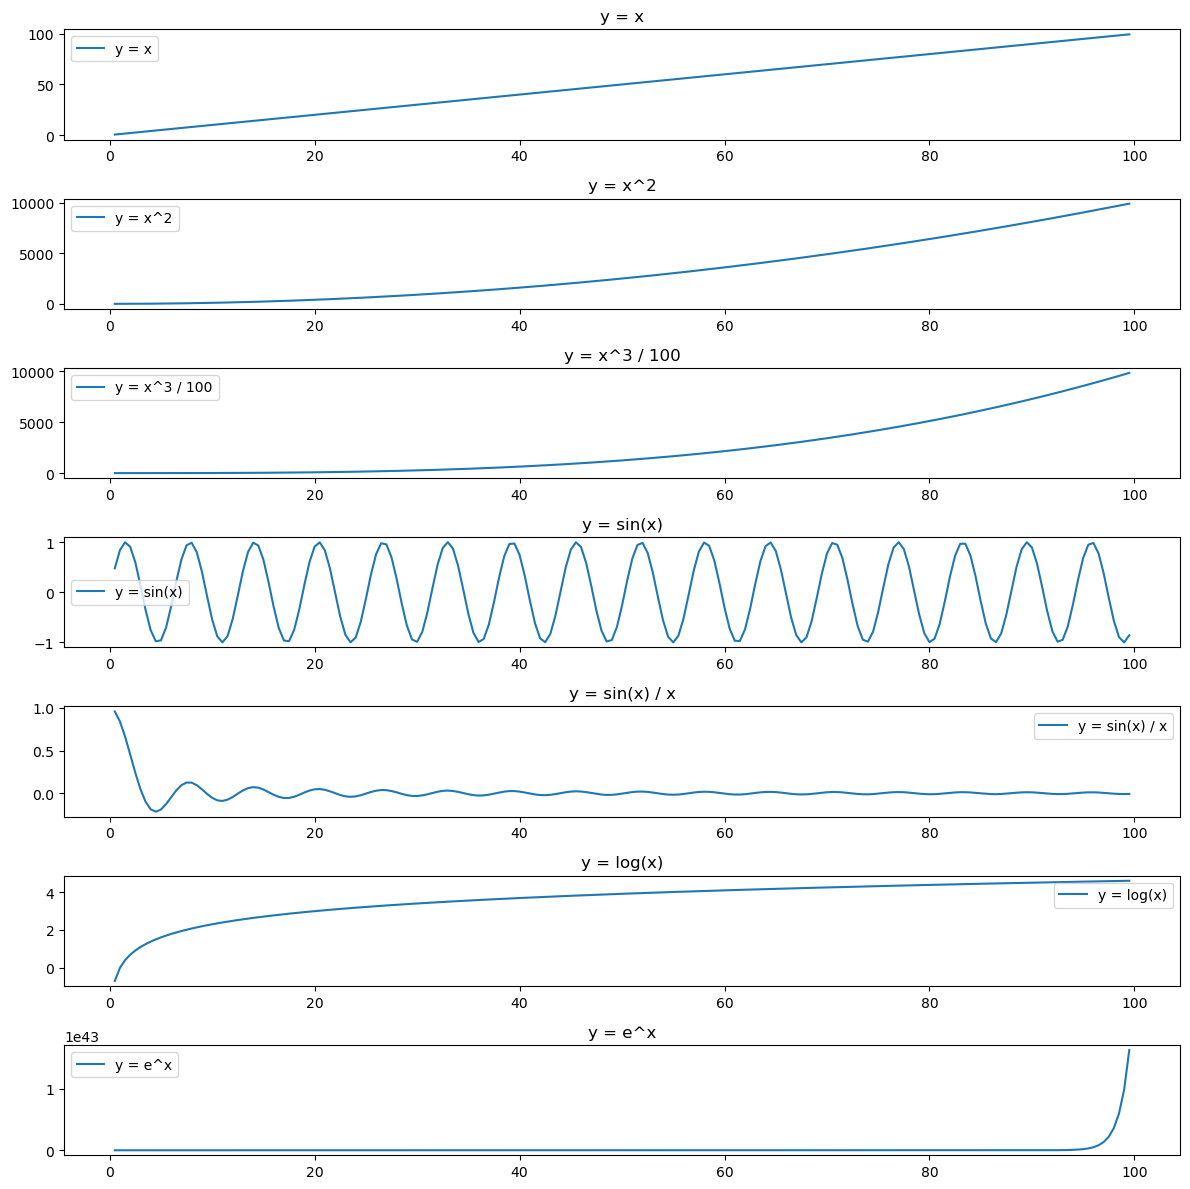

In [233]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.0, 0.5)

y1 = x
y2 = x**2
y3 = (x**3) / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

fig, axs = plt.subplots(7, figsize=(12, 12))

axs[0].plot(x, y1, label='y = x')
axs[0].set_title('y = x')
axs[0].legend()

axs[1].plot(x, y2, label='y = x^2')
axs[1].set_title('y = x^2')
axs[1].legend()

axs[2].plot(x, y3, label='y = x^3 / 100')
axs[2].set_title('y = x^3 / 100')
axs[2].legend()

axs[3].plot(x, y4, label='y = sin(x)')
axs[3].set_title('y = sin(x)')
axs[3].legend()

axs[4].plot(x, y5, label='y = sin(x) / x')
axs[4].set_title('y = sin(x) / x')
axs[4].legend()

axs[5].plot(x, y6, label='y = log(x)')
axs[5].set_title('y = log(x)')
axs[5].legend()

axs[6].plot(x, y7, label='y = e^x')
axs[6].set_title('y = e^x')
axs[6].legend()

plt.tight_layout()
plt.show()


## Reference : Chatgpt and https://www.geeksforgeeks.org/plot-mathematical-expressions-in-python-using-matplotlib/ 

### Question 10
### Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [290]:
import pandas as pd
mat = np.random.uniform(1,2,size=(20,5))
print(mat)
df = pd.DataFrame(mat)
print(df)
df.rename(columns = {0:"a",1:"b",2:"c",3:"d",4:"e"},inplace=True)
print(df)
highest_std_col = df.std().idxmax()
print(highest_std_col,df.std().max())
lowest_mean_row = df.mean(axis=1).idxmin()   ### axis = 0 denotes column and axis = 1 denotes row
print(lowest_mean_row,df.std(axis=1).min())

[[1.99375997 1.16536956 1.21336088 1.52542932 1.24252963]
 [1.33347988 1.81472622 1.79212936 1.80212574 1.73993905]
 [1.30759868 1.57937645 1.92545838 1.52544776 1.44061657]
 [1.95826632 1.84680636 1.8252065  1.62611609 1.49203831]
 [1.4406235  1.88399217 1.30583797 1.0243044  1.45918337]
 [1.9455964  1.75720206 1.77764622 1.71020119 1.11711039]
 [1.78797717 1.29768402 1.01650142 1.89644879 1.25182554]
 [1.55165623 1.47583796 1.19456198 1.45395154 1.1748666 ]
 [1.01590132 1.53432912 1.01046556 1.67305628 1.25515874]
 [1.16596865 1.00186772 1.91663202 1.73872485 1.10153759]
 [1.12573931 1.34518404 1.81571844 1.95231713 1.87387172]
 [1.64906376 1.25349173 1.49991215 1.40546267 1.0595988 ]
 [1.43490076 1.67766118 1.68806169 1.81726868 1.31011359]
 [1.41608325 1.5477641  1.5108134  1.4987393  1.99381805]
 [1.4441014  1.50470293 1.70073992 1.87419687 1.29888409]
 [1.37932956 1.10035348 1.48995193 1.22296855 1.66400625]
 [1.62315472 1.04094937 1.76637218 1.19198757 1.272846  ]
 [1.85898647 1

### Question 11
### Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [274]:
df['f'] = df[['a','b','c','d','e']].sum(axis=1)
print(df)
df['g'] = np.where(df['f'] < 8, "LT8", "GT8")
print(df)
print("Count of LT8 is :",df['g'].value_counts()["LT8"])
std1 = df[df["g"]=="LT8"]["f"].std()
std2 = df[df["g"]=="GT8"]["f"].std()
print("Standard deviation for LT8 and GT8 are ",std1,std2)

           a         b         c         d         e         f    g
0   1.634762  1.242357  1.721618  1.315270  1.985944  7.899952  LT8
1   1.784824  1.110691  1.661741  1.889496  1.856167  8.302918  GT8
2   1.151862  1.428524  1.377671  1.801499  1.640767  7.400323  LT8
3   1.458791  1.637325  1.449518  1.368010  1.623163  7.536805  LT8
4   1.209826  1.029110  1.832571  1.524641  1.812560  7.408709  LT8
5   1.574303  1.084823  1.130615  1.721009  1.910056  7.420807  LT8
6   1.436127  1.010448  1.558489  1.148004  1.426171  6.579239  LT8
7   1.490580  1.132201  1.052951  1.406052  1.896132  6.977917  LT8
8   1.313164  1.975918  1.664260  1.498206  1.358105  7.809653  LT8
9   1.088910  1.027045  1.394698  1.536209  1.360835  6.407697  LT8
10  1.180663  1.861544  1.268747  1.761573  1.010558  7.083084  LT8
11  1.708538  1.148932  1.805728  1.103010  1.305285  7.071492  LT8
12  1.802583  1.311288  1.430489  1.857068  1.108437  7.509865  LT8
13  1.683229  1.809220  1.966151  1.867994  1.99

### Question 12
### Write a small piece of code to explain broadcasting in numpy.

Broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations

In [280]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

vector = np.array([10, 20, 30])

result = matrix + vector
print(result)

[[11 22 33]
 [14 25 36]
 [17 28 39]]


When you add the 1D vector to the 2D matrix, numpy automatically "broadcasts" the vector to match the shape of the matrix. The vector is added to each row of the matrix.

### Question 13
### Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [288]:
arr = np.array([1,2,4,-4,33,35,3,3,5,2])
mx = 1e9
ind = -1;
for i in range(len(arr)):
    if mx>arr[i]:
        mx = arr[i]
        ind = i

print(ind)
print(np.argmin(arr))

3
3
